In [1]:
import netCDF4 as nc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


#w = tracers/west/PREIND_BCCOND/PREIND_BC_v201905

In [2]:
tdir = '/results/forcing/LiveOcean/boundary_conditions/'
pidir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/PI_BOUND_COND/CLEAN/PREIND_BCCOND/'

w = nc.Dataset(f'{tdir}LiveOcean_v201712_y2015m03d29.nc')
w2 = nc.Dataset(f'{pidir}PREIND_BC_v201905_y2015m03d29.nc')
print(w['DIC'])
print(w2['DIC'])

wx = w['DIC'][:]-w2['DIC'][:]



<class 'netCDF4._netCDF4.Variable'>
float64 DIC(time_counter, deptht, yb, xbT)
    _FillValue: nan
    grid: SalishSea2
    long_name: Dissolved Inorganic Carbon
    units: muM
unlimited dimensions: time_counter
current shape = (1, 40, 1, 950)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 DIC(time_counter, deptht, yb, xbT)
unlimited dimensions: time_counter
current shape = (1, 40, 1, 950)
filling on, default _FillValue of 9.969209968386869e+36 used



(1, 40, 1, 950)


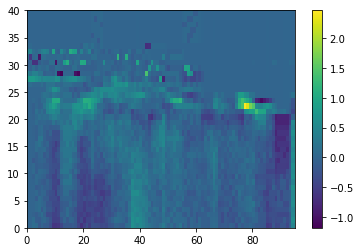

In [3]:
print(np.shape(w2['TA']))
plt.pcolormesh(wx[0,:,0,0:95]-wx[0,:,0,95:95*2])
plt.colorbar()

In [4]:
import arrow
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)


boundary_dic = np.zeros([365,40,2])

tdir = '/results/forcing/LiveOcean/boundary_conditions/'
pidir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/PI_BOUND_COND/CLEAN/PREIND_BCCOND/'

w = nc.Dataset(f'{tdir}LiveOcean_v201712_y2015m03d29.nc')
w2 = nc.Dataset(f'{pidir}PREIND_BC_v201905_y2015m03d29.nc')

for i in range(0,365):

    tdate = arrow_array[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    print(mm)
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}'

    br = nc.Dataset(f'{tdir}LiveOcean_v201712_{ymd}.nc')
    pi = nc.Dataset(f'{pidir}PREIND_BC_v201905_{ymd}.nc')
    
    br_dic = np.nanmean(br['DIC'][0,:,0,:],axis = 1)
    pi_dic = np.nanmean(pi['DIC'][0,:,0,:],axis = 1)
    
    boundary_dic[i,:,0] = br_dic
    boundary_dic[i,:,1] = pi_dic
    
    print(ymd)

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI5_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_summer[i,:,:,:] = t_Oma

01
y2015m01d01
01
y2015m01d02
01
y2015m01d03
01
y2015m01d04
01
y2015m01d05
01
y2015m01d06
01
y2015m01d07
01
y2015m01d08
01
y2015m01d09
01
y2015m01d10
01
y2015m01d11
01
y2015m01d12
01
y2015m01d13
01
y2015m01d14
01
y2015m01d15
01
y2015m01d16
01
y2015m01d17
01
y2015m01d18
01
y2015m01d19
01
y2015m01d20
01
y2015m01d21
01
y2015m01d22
01
y2015m01d23
01
y2015m01d24
01
y2015m01d25
01
y2015m01d26
01
y2015m01d27
01
y2015m01d28
01
y2015m01d29
01
y2015m01d30
01
y2015m01d31
02
y2015m02d01
02
y2015m02d02
02
y2015m02d03
02
y2015m02d04
02
y2015m02d05
02
y2015m02d06
02
y2015m02d07
02
y2015m02d08
02
y2015m02d09
02
y2015m02d10
02
y2015m02d11
02
y2015m02d12
02
y2015m02d13
02
y2015m02d14
02
y2015m02d15
02
y2015m02d16
02
y2015m02d17
02
y2015m02d18
02
y2015m02d19
02
y2015m02d20
02
y2015m02d21
02
y2015m02d22
02
y2015m02d23
02
y2015m02d24
02
y2015m02d25
02
y2015m02d26
02
y2015m02d27
02
y2015m02d28
03
y2015m03d01
03
y2015m03d02
03
y2015m03d03
03
y2015m03d04
03
y2015m03d05
03
y2015m03d06
03
y2015m03d07
03
y2015m0

In [5]:
boundary_intrusion = boundary_dic[:,:,0]-boundary_dic[:,:,1]

avg_boundary_intrusion = np.nanmean(boundary_intrusion,axis = 0)
print(np.shape(avg_boundary_intrusion))

(40,)


In [6]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
print(w['gdept_1d'])
depth = w['gdept_1d'][:][0]
print(depth)

<class 'netCDF4._netCDF4.Variable'>
float64 gdept_1d(t, z)
    _FillValue: nan
    standard_name: gdept_1d
    long_name: nominal depth of T-grid points
    units: m
    positive: down
unlimited dimensions: t
current shape = (1, 40)
filling on
[  0.50000027   1.50000314   2.5000115    3.50003055   4.50007042
   5.50015083   6.50031022   7.50062342   8.50123623   9.50243254
  10.5047653   11.50931127  12.51816684  13.53541212  14.56898216
  15.63428737  16.76117342  18.00713456  19.48178514  21.38997868
  24.10025665  28.22991514  34.68575798  44.51772486  58.48433368
  76.58558445  98.06295924 121.8665184  147.08945807 173.11448217
 199.57304923 226.26030574 253.06663733 279.93454976 306.83419736
 333.75016973 360.6745318  387.60320347 414.53408835 441.46610968]


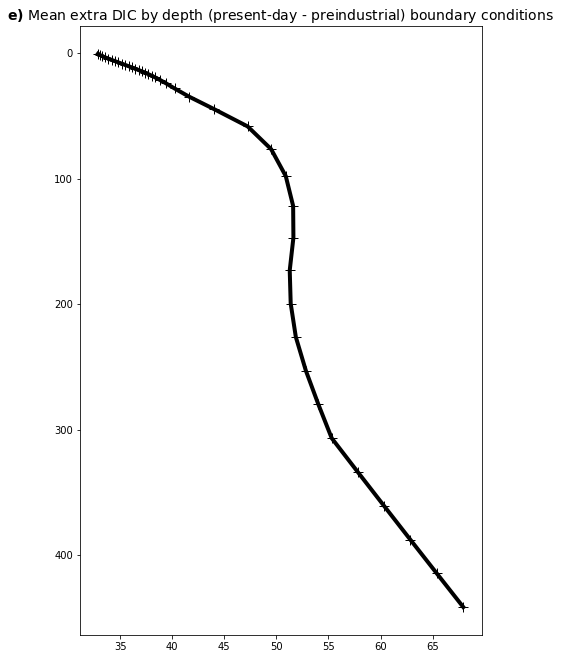

In [7]:
fact = 0.8
fig, ax3 = plt.subplots(1,1, figsize=(9*fact, 14*fact), facecolor='w', edgecolor='k')\


ax3.plot(avg_boundary_intrusion,depth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')

ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (present-day - preindustrial) boundary conditions', fontsize = 14)
ax3.invert_yaxis()

In [37]:
def oned_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):
    import sys
    sys.path.append('/data/tjarniko/mocsy')
    import mocsy
    import numpy as np
    import gsw
    
#     size_box = np.shape(tdic)
#     size_0 = size_box[0]
#     size_1= size_box[1]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    #tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tdepth = np.ravel(depth_this)
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup
    print('hi')
#     pHr = pH.reshape(size_0,size_1)
#     OmAr = OmegaA.reshape(size_0,size_1)
#     pco2r = pco2.reshape(size_0,size_1)
    
    return pH, OmegaA, pco2

In [55]:
def find_DIC_corresp_to_pco2(tsal, ttemp, tpco2, tta, pres_atm, depth_this):
    
    import numpy as np
    import mocsy
    
    steps = 10000
    tsal_r = np.zeros([steps])
    tsal_r[:] = tsal
    ttemp_r = np.zeros([steps])
    ttemp_r[:] = ttemp
    tta_r = np.zeros([steps])
    tta_r[:] = tta * 1e-3
    tpres_r = np.zeros([steps])
    tpres_r[:] = pres_atm
    depth_r = np.zeros([steps])
    depth_r[:] = depth_this
    tzero = np.zeros([steps])

    end_d = 2400
    start_d = 600
    intvl = (end_d - start_d)/steps
    tdic_r = np.arange(start_d,end_d-0.1,intvl) * 1e-3
    
    response_tup = mocsy.mvars(temp=ttemp_r, sal=tsal_r, alk=tta_r, dic=tdic_r, 
                       sil=tzero, phos=tzero, patm=tpres_r, depth=depth_r, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup    
    
    diffmat = pco2 - tpco2
    idx, ans = find_nearest( diffmat,0 )
    
    if ans> 2:
        print('Danger, pco2 found >2 uatm from pco2 given')
#     print(idx)
#     print('difference between real pco2 and pco2 from calc. dic: ',ans)
#     print('DIC found this way:', tdic_r[idx]*1e3)
    fin_dic = tdic_r[idx]*1e3
    
    return fin_dic

def find_nearest(array, value):
    
    import numpy as np
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [88]:
def intrusion(pycnal_witnessed_atm_co2, AOU, DIC, TA):

    print(pycnal_witnessed_atm_co2)
#(1) estimate AOU on 26 (assoc with water parcel with DIC_{w,2019,26,jdf})
# = f(O2_{w,2019,26,jdf},S_{w,2019,26,jdf},T_{w,2019,26,jdf}, P_{w,2019,26,jdf})
#(P is there to determine T when last at surface - I'll call it preT next)

#     osol = gsw.O2sol(sal,temp,depth_this,-125,50)
#     AOU = osol - O2
    print('max AOU: '+str(np.max(AOU)) + ', min AOU: '+ str(np.min(AOU)))
    AOU_stoich = np.copy(AOU)
    AOU_stoich = AOU_stoich * (117/170)
    #AOU_zeroed[AOU<0] = 0  
    print(AOU_stoich)
            
#(2) estimate preformed DIC on 26 when last at surface (say 16 years ago or in 2003): 
# preDIC_{w,2003,26} = DIC_{w,2019,26,jdf} - AOU_{w,2019,26,jdf}
#{AOU may be about 130 umol/kg or so in this e.g.  - we are taking away the AOU because the water hasn't received the organic rain yet - here I am assuming that one
# unit of AOU means one unit of DIC and it will be close but we should check Gruber et al. 2006}

    preformed_DIC = DIC - AOU_stoich

# #(3)  estimate preformed PCO2
# #prePCO2_{w,jdf,26} = f(preDIC_{w,2003,26},TA_{w,2019,26,jdf},S_{w,2019,26,jdf},preT_{w,2019,26,jdf})
    print('finding preformed_pco2 at surface')
    pHr, OmAr, pco2r = oned_moxy(31, 10, preformed_DIC, TA, 1, 0)
    preformed_pco2 = pco2r
    print('max preformed_pco2: '+str(np.max(preformed_pco2)) + ', min preformed_pco2: '+ str(np.min(preformed_pco2)))

#(4) estimate disequilibrium PCO2 when last at surface
#diseqPCO2 = prePCO2_{w,jdf,26} - PCO2_a,2003
#{expect diseqPCO2 may be about 0-30 uatm but not 300uatm or more}
    diseqPCO2 = preformed_pco2 - pycnal_witnessed_atm_co2
    print('max diseqPCO2: '+str(np.max(diseqPCO2)) + ', min diseqPCO2: '+ str(np.min(diseqPCO2)))

    pref_pco2_inc_diseqpco2 = diseqPCO2 + 284

    
# #(5) estimate preindustrial preformed DIC
# #preDIC_PI = f( (PCO2_PI + diseqPCO2), TA_{w,2019,26,jdf},S_{w,2019,26,jdf},preT_{w,2019,26,jdf})

    pref_pco2_inc_diseqpco2 = diseqPCO2 + preformed_pco2
    print('preindustrial preformed dic')
    print('calculating preindustrial preformed DIC')    
#     preind_dic = np.zeros_like(DIC)
#     preind_dic_r = np.ravel(preind_dic)
#     pref_pco2_inc_diseqpco2_r = np.ravel(pref_pco2_inc_diseqpco2)
#     depth_r = np.ravel(depth_this)
#     sal_r = np.ravel(sal)
#     temp_r = np.ravel(temp)
#     TA_r = np.ravel(TA)

    t_dic = find_DIC_corresp_to_pco2(31, 10, pref_pco2_inc_diseqpco2, TA, 1, 0)
    print(t_dic)
    print('intrusion')
    print(DIC - t_dic)
    intru = DIC - t_dic
    return(intru)
#     deltaDIC = preformed_DIC - preind_pref_dic
#     print('max deltaDIC: '+str(np.max(deltaDIC)) + ', min deltaDIC: '+ str(np.min(deltaDIC)))

#     final_preind_DIC = DIC - deltaDIC
    



In [89]:
AOU = np.arange(0,200,20)
AOU_intrusion = np.zeros_like(AOU)
for i in range(0,20):

    AOU_intrusion[i] = intrusion(370, AOU[i], 2100, 2200)


370
max AOU: 0, min AOU: 0
0.0
finding preformed_pco2 at surface
hi
max preformed_pco2: 589.5166627197608, min preformed_pco2: 589.5166627197608
max diseqPCO2: 219.5166627197608, min diseqPCO2: 219.5166627197608
preindustrial preformed dic
calculating preindustrial preformed DIC
2139.1799999995724
intrusion
-39.179999999572374
370
max AOU: 20, min AOU: 20
13.764705882352942
finding preformed_pco2 at surface
hi
max preformed_pco2: 531.9004844406572, min preformed_pco2: 531.9004844406572
max diseqPCO2: 161.90048444065724, min diseqPCO2: 161.90048444065724
preindustrial preformed dic
calculating preindustrial preformed DIC
2120.0999999995774
intrusion
-20.09999999957745
370
max AOU: 40, min AOU: 40
27.529411764705884
finding preformed_pco2 at surface
hi
max preformed_pco2: 481.59081950135976, min preformed_pco2: 481.59081950135976
max diseqPCO2: 111.59081950135976, min diseqPCO2: 111.59081950135976
preindustrial preformed dic
calculating preindustrial preformed DIC
2099.939999999583
intru

IndexError: index 10 is out of bounds for axis 0 with size 10

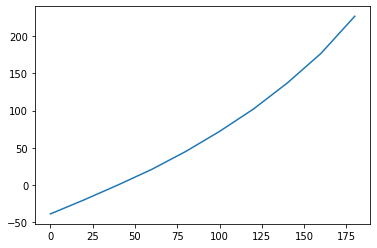

In [90]:
plt.plot(AOU,AOU_intrusion)

In [99]:
#old water - 330 uatm, aou 150
intrusion(330, 150, 2300, 2350)
print()
#young water - 380 uatm, aou 20 
intrusion(380, 30, 2050, 2200)
#yound water -AOU 20, saw 390

330
max AOU: 150, min AOU: 150
103.23529411764706
finding preformed_pco2 at surface
hi
max preformed_pco2: 450.7007874034718, min preformed_pco2: 450.7007874034718
max diseqPCO2: 120.7007874034718, min diseqPCO2: 120.7007874034718
preindustrial preformed dic
calculating preindustrial preformed DIC
2231.3399999995468
intrusion
68.66000000045324

380
max AOU: 30, min AOU: 30
20.647058823529413
finding preformed_pco2 at surface
hi
max preformed_pco2: 360.3661654584819, min preformed_pco2: 360.3661654584819
max diseqPCO2: -19.633834541518127, min diseqPCO2: -19.633834541518127
preindustrial preformed dic
calculating preindustrial preformed DIC
2019.4799999996053
intrusion
30.520000000394703


30.520000000394703